In [1]:
import matplotlib.pyplot as plt
import numpy as np
from math import *
from numpy import *

In [2]:
f=lambda x: 1/(1+x**2)

In [3]:
class RectangleG (object) :
    def __init__ ( self,a,b,n,f ) :
        self.a = a
        self.b = b
        self.x = np . linspace ( a ,  b ,  n+1)
        self.f = f
        self.n = n
    def integrate ( self,f):
        x= self.x
        y=f(x)
        h =float(x[1]-x[0])
        s =sum( y[0 :-1])
        return h*s
    def Graph (self,f,resolution =1001):
        xl =self.x
        yl = f(xl)
        xlist_fine =np . linspace (self.a ,self.b ,resolution)
        for i in  range( self.n) :
            x_rect = [ xl[i], xl[i], xl[i+1], xl[i+1], xl[i]]
            y_rect = [0,yl[i], yl[i], 0, 0]
            plt.plot ( x_rect, y_rect ,"r")
        yflist_fine=f(xlist_fine)
        plt.plot(xlist_fine, yflist_fine)
        #plt.plot(xl,yl,"bo-")
        plt.xlabel('x')
        plt.ylabel('f(x)')
        plt.title('Methode des rectangles gauches')
        plt.text(0.5*(self.a + self.b), f(self.b) ,'I_{}= {:0.8f}'.format(self.n,(self.integrate(f)), fontsize =15))
    

In [4]:
R=RectangleG(-1, 1, 5, f)

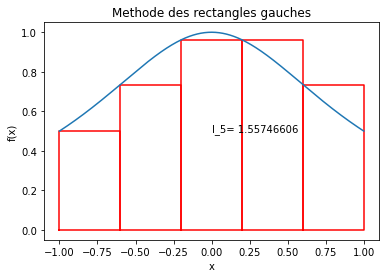

In [5]:
R.Graph(f)

In [6]:
class RectangleM (object) :
    def __init__ ( self,a,b,n,f ) :
        self.a = a
        self.b = b
        self.x = np . linspace ( a ,  b ,  n+1)
        self.f = f
        self.n = n
    def integrate ( self,f):
        x= self.x
        y=f(x)
        for i in range (self.n):
            m=(x[i]+x[i+1])/2  
        h =float(x[1]-x[0])
        s=sum(y[m])
        return h*s
    def Graph (self,f,resolution =1001):
        xl =self.x
        yl = f(xl)
        xlist_fine =np . linspace (self.a ,self.b ,resolution)
        for i in range (self.n):
            x_rect = [ xl[i], xl[i], xl[i+1], xl[i+1], xl[i]]
            y_rect = [0,yl[i], yl[i], 0, 0]
            plt.plot ( x_rect, y_rect ,"r")
        yflist_fine=f(xlist_fine)
        plt.plot(xlist_fine, yflist_fine)
        #plt.plot(xl,yl,"bo-")
        plt.xlabel('x')
        plt.ylabel('f(x)')
        plt.title('Methode des rectangles au point milieu')
        plt.text(0.5*(self.a + self.b), f(self.b) ,'I_{}= {:0.8f}'.format(self.n,(self.integrate(f)), fontsize =15))
            
        

In [7]:
class Trapezoidal (object) :
    def __init__ ( self ,a, b,n, f ) :
        self.a = a
        self.b = b
        self.x = np.linspace(a,b,n+1)
        self.f = f
        self.n = n
    def integrate ( self, f) :
        x=self.x
        y=f(x)
        h = float(x[1] - x[0])
        s = y[0] + y[-1] + 2.0*sum(y[1:-1])
        return h * s / 2.0
    def Graph(self,f,resolution=1001):
        xl = self.x
        yl = f(xl)
        xlist_fine=np.linspace(self.a, self.b, resolution)
        for i in range(self.n):
            x_rect = [xl[i], xl[i], xl[i+1], xl[i+1], xl[i]]
            y_rect = [0, yl[i], yl[i+1], 0, 0]
            plt.plot(x_rect, y_rect,"m")
        yflist_fine = f(xlist_fine)
        plt.plot(xlist_fine, yflist_fine)
        plt.plot(xl, yl,"cs") 
        plt.ylabel ('f(x)')
        plt.title ('Methode des Trapèzes')
        plt.text( 0.5*( self.a+ self.b ) , f(self.b ) , 'I_{} ={:0.8f}'.format(self.n,self.integrate( f ) ) , fontsize =15 )
            

In [8]:
class Simpson (object) :
    def __init__ ( self ,a, b,n, f ) :
        self.a = a
        self.b = b
        self.x = np.linspace(a,b,n+1)
        self.f = f
        self.n = n
    def integrate ( self, f) :
        x=self.x
        y=f(x)
        h=float(x[2] - x[1])
        n =len(x)-1
        s = y[0] + y[-1] + 4.0*sum(y[1:-1])
        return h * s / 4.0
    def Graph ( self,f, resolution=1001) :
        xl=self.x
        yl= f(xl)
        xlist_fine=np.linspace(self.a , self.b,resolution)
        for i in range (self.n) :
            xx = np.linspace(xl[i] ,xl[i+1], resolution)
            m=(xl[i]+xl[i+1])/2
            a= xl[i]
            b= xl[i+1]
            l0=(xx-m)/(a-m)*(xx-b )/(a-b)
            l1=(xx-a)/(m-a )*(xx-b)/(m-b)
            l2=(xx-a )/(b-a)*(xx-m)/(b-m)
            P= f(a)*l0+f(m)*l1+f(b)*l2
            plt.plot(xx,P,"r")
        yflist_fine=f(xlist_fine)
        plt.plot(xlist_fine,yflist_fine,"g")
        plt.plot(xl,yl,"bo")
        plt.xlabel('x')
        plt.ylabel('f(x)')
        plt.title('Methode de simpson')
        plt.text( 0.5*( self.a+ self.b ) , f(self.b ) , 'I_{} ={:0.8f}'.format(self.n,self.integrate( f ) ) , fontsize =15 )
                

In [9]:
def sim(n,f):
    R=RectangleG(-1,1,n,f)
    T=Trapezoidal(-1,1,n,f) 
    simp=Simpson(-1,1,n,f)
    Rm=RectangleM(-1,1,n,f)
    fig= plt.figure(figsize=(12,4))
    plt.subplot(221)
    R.Graph(f)  
    plt.subplot(222) 
    T.Graph(f)
    plt.subplot(223)
    simp.Graph(f)
    plt.subplot(224)
    Rm.Graph(f)
    plt.show()

In [10]:
from ipywidgets import interact, interactive, fixed, interact_manual, widgets

In [11]:
def simul(n, f):
    R=RectangleG(-1, 1, n, f)
    return R.Graph(f)

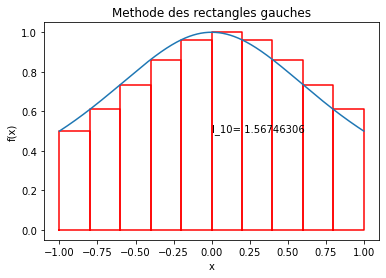

In [12]:
simul(10, f)

interactive(children=(IntSlider(value=10, description='n', max=50, min=1, step=5), Dropdown(description='f', o…

<function __main__.sim(n, f)>

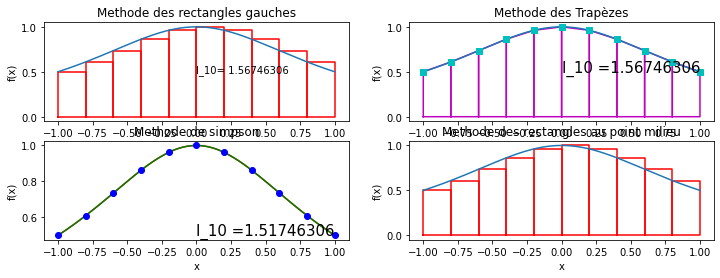

In [13]:
interact(sim, n=widgets.IntSlider(min=1, max=50, step=5, value=10), f={'1/(1+x**2)':lambda x:1/(1+x**2), 'sin(x)' : lambda x: sin(x), 'cos(x)': lambda x: cos(x), 'x**2-x+5' : lambda x: x**2-x+5})